In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# imports
import cv2

# Task
- find and remove all similar-looking images in a folder
- The input of the program should be a path to a folder with images
- the result program should remove all non-essential images for data collection 
- duplicated or almost duplicated images that have only minor differences from the original that may be considered as non-essential.

# Questions
- What did you learn after looking on our dataset?
- How does you program work?
- What values did you decide to use for input parameters and how did you find these values?
- What you would suggest to implement to improve data collection of unique cases in future?
- Any other comments about your solution?

### Load dataset from "./../data/dataset/" and get all image filenames

In [1]:
import os
import pandas

# get all filenames from "./../data/dataset/"
filenames = os.listdir("./../data/dataset/")

# create pandas dataframe from filenames
images_df = pandas.DataFrame(filenames, columns=["filename"])

images_df

,filename
0,c23-1616717457970.png
1,c23-1616724298401.png
2,c20_2021_04_27__16_10_11.png
3,c10-1623895235035.png
4,c20-1616771217916.png
...,...
1075,c23-1616735928256.png
1076,c23-1616698639412.png
1077,c23-1616787323135.png
1078,c20_2021_03_26__15_35_31.png


### Number of files

In [8]:
print(f"Number of files in the dataset: {len(images_df.index)}")

Number of files in the dataset: 1080


### Image resolution

In [7]:
image_resolutions = set()

for filename in filenames:
    image = cv2.imread(f"./../data/dataset/{filename}")
    if image is None:
        print(f"Error: could not read image {filename}")
        continue

    # get camera id from filename (first three characters of filename, i.e. c10, c21)
    camera_id = filename[:3]
    image_resolutions.add(f"{camera_id}_{image.shape}")

print(f"Unique image resolutions: {image_resolutions}")

Error: could not read image c21_2021_03_27__10_36_36.png


{'c10_(1520, 2688, 3)',
 'c10_(480, 640, 3)',
 'c20_(1080, 1920, 3)',
 'c21_(1080, 1920, 3)',
 'c21_(6, 10, 3)',
 'c21_(619, 1100, 3)',
 'c21_(675, 1200, 3)',
 'c23_(1080, 1920, 3)'}

### Thoughts on the image resolutions

- The results of the image_resolution show that there are multiple image resolutions for the same camera_id.  \
    Which is odd, since you would expect the same resolution over time from the same source.
- Images may need to be resized for the comparison functions to work properly.
- Images like 'c21_(6, 10, 3)' with a very low resolution could be an error in processing and my need to be discarded.

### Number of image channels
- The number of image channels for all cameras is 3

### <span style="color:red">Why error on file 'c21_2021_03_27__10_36_36.png'?</span>
- TODO add handling for files that cannot be read with cv2

In [12]:
# load and show the image "./../data/dataset/c21_2021_03_27__10_36_36.png"

image = cv2.imread("./../data/dataset/c21_2021_03_27__10_36_36.png")
print(f"Type of the image: {type(image)}")
cv2.imshow("Image", image)

Type of the image: <class 'NoneType'>


error: OpenCV(4.6.0) /croot/opencv-suite_1691620365762/work/modules/highgui/src/window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


- The file has either no height, or width judging from the OpenCV error.  \
It could be that the file is corrupted and that is why OpenCV is not able to read it properly.

### Display a sample image from all cameras and all different resolutions

{'c10_(1520, 2688, 3)',  \
 'c10_(480, 640, 3)',  \
 'c20_(1080, 1920, 3)',  \
 'c21_(1080, 1920, 3)',  \
 'c21_(6, 10, 3)',  \
 'c21_(619, 1100, 3)',  \
 'c21_(675, 1200, 3)',  \
 'c23_(1080, 1920, 3)'}  \

- There should be eight sample images.

#### Load 8 sample images into sample_filenames

In [14]:
image_resolutions = set()
sample_filenames = []

for filename in filenames:
    image = cv2.imread(f"./../data/dataset/{filename}")
    if image is None:
        print(f"Error: could not read image {filename}")
        continue

    # get camera id from filename (first three characters of filename, i.e. c10, c21)
    camera_id = filename[:3]

    if f"{camera_id}_{image.shape}" not in image_resolutions:
        sample_filenames.append(filename)

    # add image resolution to the set
    image_resolutions.add(f"{camera_id}_{image.shape}")

    if len(image_resolutions) == 8:
        break

print(f"Sample filenames: {sample_filenames}")

Error: could not read image c21_2021_03_27__10_36_36.png
Sample filenames: ['c23-1616717457970.png', 'c20_2021_04_27__16_10_11.png', 'c10-1623895235035.png', 'c21_2021_03_26__10_50_00.png', 'c10-1623871098865.png', 'c21_2021_03_27__12_53_37.png', 'c21_2021_04_27__12_04_38.png', 'c21_2021_04_27__12_44_38.png']


#### Display sample images

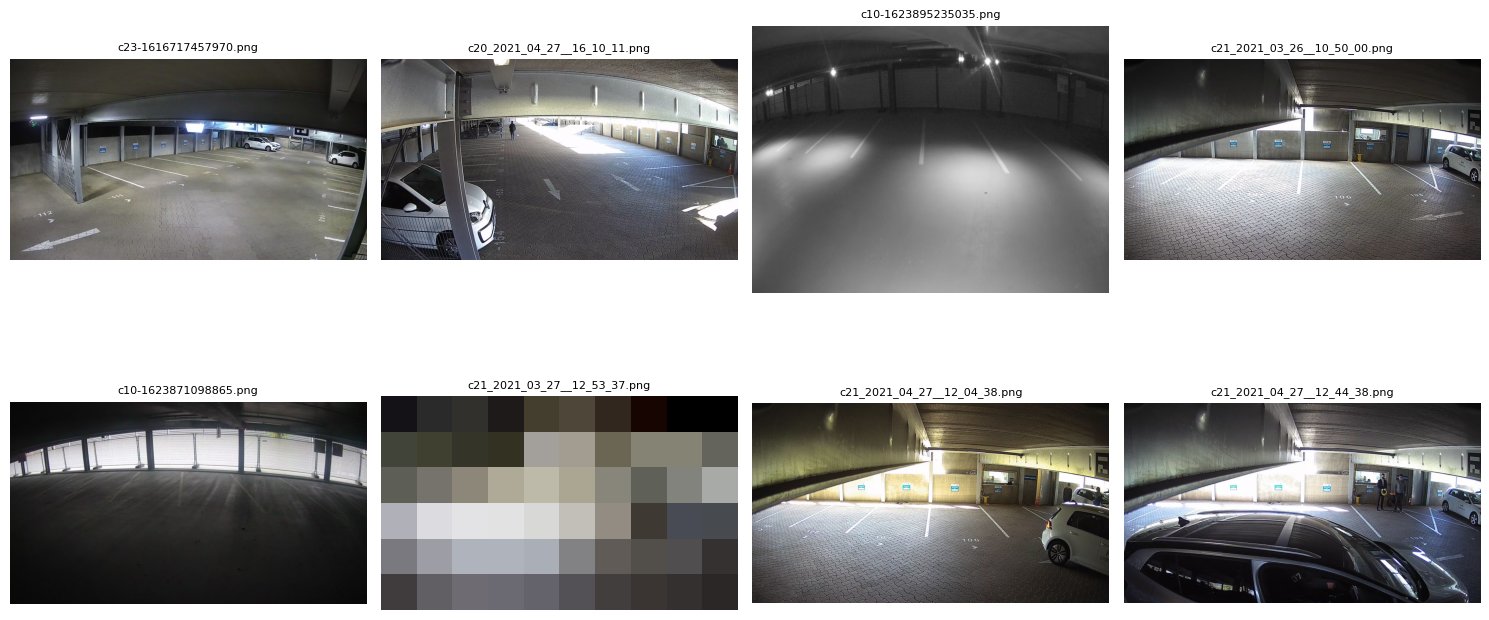

In [1]:
import cv2
import matplotlib.pyplot as plt
import math

# display images from sample_filenames with matplotlib in grid
sample_filenames = ['c23-1616717457970.png', 
                    'c20_2021_04_27__16_10_11.png', 
                    'c10-1623895235035.png', 
                    'c21_2021_03_26__10_50_00.png', 
                    'c10-1623871098865.png', 
                    'c21_2021_03_27__12_53_37.png', 
                    'c21_2021_04_27__12_04_38.png', 
                    'c21_2021_04_27__12_44_38.png']

cols = 4
rows = 2

fig, axs = plt.subplots(rows, cols, figsize=(15, 8))

for i, filename in enumerate(sample_filenames):
    # calculate current row and column
    row = i // cols
    col = i % cols
    
    image = cv2.imread(f"./../data/dataset/{filename}")

    # convert image from RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    
    # Display the image
    axs[row, col].imshow(image_rgb)
    axs[row, col].axis('off')
    axs[row, col].set_title(f"{filename}", fontsize=8)

plt.tight_layout()
plt.show()


### Checkout timestamps

In [11]:
import re

# regex patterns
pattern_unix_timestamp = re.compile(r'c\d{2}-\d{13}\.png')
pattern_date_time = re.compile(r'c\d{2}_\d{4}_\d{2}_\d{2}__\d{2}_\d{2}_\d{2}\.png')

def check_filename_patterns(filename):
    if pattern_unix_timestamp.match(filename) or pattern_date_time.match(filename):
        return True
    else:
        return False, 'Does not match any pattern'

flag = True

# Check each filename
for filename in filenames:
    matches = check_filename_patterns(filename)
    if not matches:
        print(f"{filename} does not match any of the two patterns!")
        flag = False

if flag:
    print("All filenames match the patterns!")

All filenames match the patterns!


#### File naming convention
- cameraID-UNIXtimestamp.png
- cameraID_Year_Month_Day__Hours_Minutes_Seconds.png  \
every single digit leads with a 0

### Filetypes check

In [2]:
# check filetype ending of files in filenames
filetype_endings = set()

for filename in filenames:
    filetype_endings.add(filename[-4:])

print(f"Filetype endings: {filetype_endings}")

Filetype endings: {'.png'}


## Summary of dataset

Number of files: 1080 \
Different image resolutions: 
- 'c10_(1520, 2688, 3)'
- 'c10_(480, 640, 3)'
- 'c20_(1080, 1920, 3)'
- 'c21_(1080, 1920, 3)'
- 'c21_(6, 10, 3)'
- 'c21_(619, 1100, 3)'
- 'c21_(675, 1200, 3)'
- 'c23_(1080, 1920, 3)'

Channel numbers: 3\
File types: PNG\
Camera ids: 4 \
dateformats: 2
- UNIX timestamp in milliseconds
- Year_Month_Day__Hours_Minutes_Seconds  \
every single digit leads with a 0

## Testing provided functions
- 